# Binary classification single feature

Classification using "raw" python or libraries (SciKit Learn, Tensorflow).

The classification is first on a single boundary defined by a continuous univariate function and added white noise

In [1]:
import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from sklearn import metrics as skMetrics
from sklearn.linear_model import LogisticRegression as SkLinReg
import scikitplot as skplt
import scipy as sy
import pandas

## Model

We want to measure or predict a value y to be above a threshold. E.g.: y is a temperature.

We know a feature x, y is related to x through a quadratic function we do not a priori know and some unknown

This unknown is modeled by a Gaussian noise

In [2]:
# Single feature, Gaussian noise
def generateBatch(N):
    #
    xMin = 0
    xMax = 1
    b = 0.2
    std = 0.2
    # Threshold from 0 to 1
    threshold = 1
    #
    x = random.uniform(xMin, xMax, N)
    # 4th degree relation between y and x
    yClean = 2*(x**4 + (x-0.3)**3 + b)
    labels = yClean + random.normal(0, std, N) > threshold
    return (x, yClean, labels)

The values of X are uniformly distributed and independent

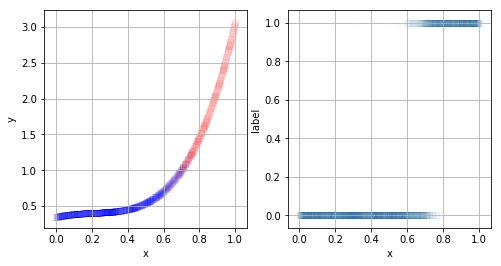

In [3]:
N = 2000
# x and y have 1 dim in R, label has 1 dim in B
xTrain, yCleanTrain, labelTrain = generateBatch(N)

colors = ['blue','red']

fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(xTrain, yCleanTrain, c=labelTrain, cmap=pltcolors.ListedColormap(colors), marker=',', alpha=0.01)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.subplot(1,2,2)
plt.scatter(xTrain, labelTrain, marker=',', alpha=0.01)
plt.xlabel('x')
plt.ylabel('label')
plt.grid()

Bernouilli parameter of the distribution: 0.2985


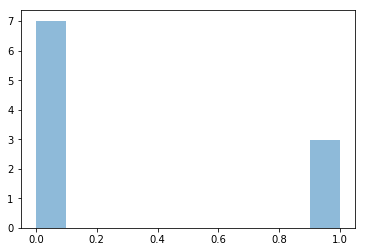

In [4]:
count, bins, ignored = plt.hist(labelTrain, 10, density=True, alpha=0.5)
p = np.mean(labelTrain)
print('Bernouilli parameter of the distribution:', p)

Note: The two values are not a priori equi probable. In theory, ressampling of the training values would be required to balance the a priori distribution.

In [5]:
xTest, yTest, labelTest = generateBatch(N)

### Logistic and log of Logistic functions

In [6]:
def logistic(X):
    return (1+(np.exp(-(X))))**-1

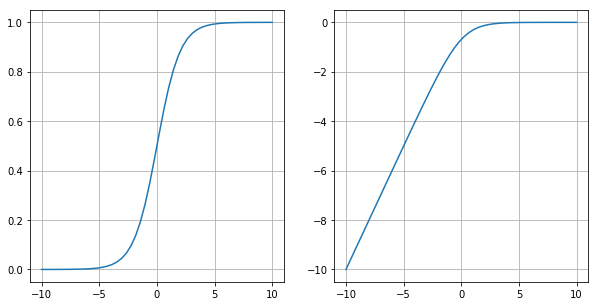

In [7]:
xx = np.linspace(-10, 10)
xlogistic = logistic(xx)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(xx, xlogistic)
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(xx, np.log(xlogistic))
plt.grid()

# Logistic regression

\begin{align}
y \in \left\{ 0, 1 \right\}
\end{align}

\begin{align}
p(Y=1 \mid x) & = \frac{1}{1+e^{-f_\theta(x)}} \\
f_\theta(x) & = b + w x \\
\theta &= \{b, w\}
\end{align}

We are looking for the value of w that maximize the likelyhood:
\begin{align}
\hat{\theta} & = \max_{\theta}{\prod_{i=0}^N{p(y_i \mid  x_i, w)}} \\
& = \max_{\theta}{\sum_{i=0}^N{log \bigl(p(y_i \mid x_i, w)\bigr)} } \\
& = \max_{\theta}{\sum_{i=0}^N{log \biggl(\bigl(\frac{1}{1+e^{-f_\theta(x)}}\bigr)^{y_i}\bigl(1-\frac{1}{1+e^{-f_\theta(x)}}\bigr)^{1-y_i}\biggr)} } \\
& = \max_{\theta}{\sum_{i=0}^N{log \biggl(y_i * \bigl(\frac{1}{1+e^{-f_\theta(x)}}\bigr) + \bigl(1-y_i\bigr) * \bigl(1-\frac{1}{1+e^{-f_\theta(x)}}\bigr) \biggr)} } \\
\end{align}

Using the fact that $y_i$ is either 0 or 1

Reference:
- https://en.wikipedia.org/wiki/Logistic_regression


## Fitting of $b$ and then $w$


Suboptimal fitting:
- Taking some assumption on $w$ to fit $b$ as $\hat{b}$
- and then fitting $w$ with the $\hat{b}$ estimate

Estimate b = -1.32653061224


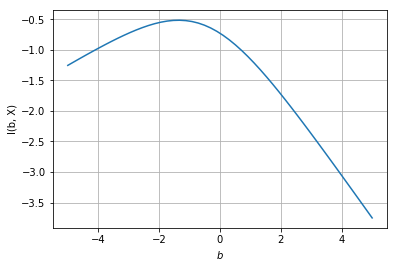

In [8]:
b = np.linspace(-5, 5)
w = 1
px = np.zeros(len(b))
for i in range(len(b)):
    fx = logistic(b[i] + w*xTrain)
    px[i] = 1/N * np.sum(np.log(labelTrain*fx + (1-labelTrain)*(1-fx)))
plt.plot(b, px);
plt.xlabel('$b$')
plt.ylabel('l(b, X)')
plt.grid()
bHat = b[np.argmax(px)]
print('Estimate b =', bHat) 

Estimate w = 2.04081632653


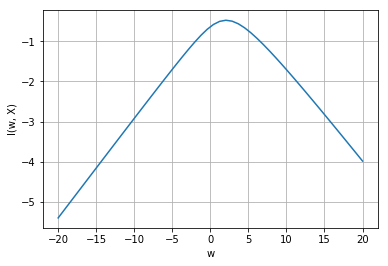

In [9]:
w = np.linspace(-20, 20)
px = np.zeros(len(w))
for i in range(len(w)):
    fx = logistic(bHat + w[i]*xTrain)
    px[i] = 1/N * np.sum(np.log(labelTrain*fx + (1-labelTrain)*(1-fx)))
plt.plot(w, px);
plt.xlabel('w')
plt.ylabel('l(w, X)')
plt.grid()
wHat = w[np.argmax(px)]
print('Estimate w =', wHat)

In [10]:
pXTest0 = logistic(bHat + wHat * xTest)
labelEst0 = pXTest0 > 0.5

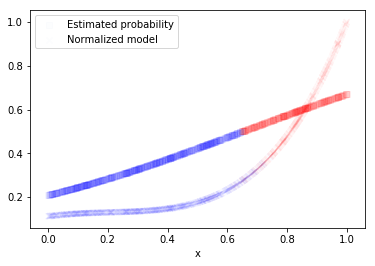

In [11]:
plt.scatter(xTest, pXTest0, c=labelEst0, cmap=pltcolors.ListedColormap(colors), marker=',', alpha=0.01);
plt.scatter(xTest, yTest/np.max(yTest), c = labelTest, cmap=pltcolors.ListedColormap(colors), marker='x', alpha=0.01);
plt.xlabel('x')
plt.legend(('Estimated probability', 'Normalized model'));

Bernouilli parameter = 0.346


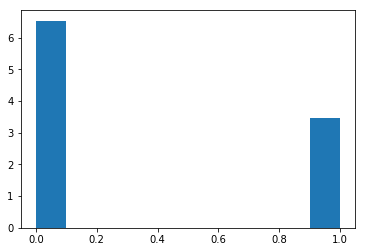

In [12]:
plt.hist(labelEst0, 10, density=True)
print('Bernouilli parameter =', np.mean(labelEst0))

In [13]:
accuracy0 = np.sum(labelTest == labelEst0)/N
print('Accuracy =', accuracy0)

Accuracy = 0.941


### Precision 
$p(y = 1 \mid \hat{y} = 1)$

In [14]:
print('Precision =', np.sum(labelTest[labelEst0 == 1])/np.sum(labelEst0))

Precision = 0.865606936416


### Recall
$p(\hat{y} = 1 \mid y = 1)$

In [15]:
print('Recall =', np.sum(labelTest[labelEst0 == 1])/np.sum(labelTest))

Recall = 0.959935897436


### Confusion matrix

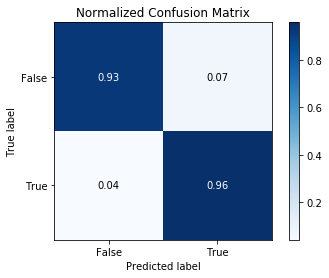

In [16]:
skplt.metrics.plot_confusion_matrix(labelTest, labelEst0, normalize=True);

In [17]:
print(skMetrics.classification_report(labelTest, labelEst0))

              precision    recall  f1-score   support

       False       0.98      0.93      0.96      1376
        True       0.87      0.96      0.91       624

    accuracy                           0.94      2000
   macro avg       0.92      0.95      0.93      2000
weighted avg       0.94      0.94      0.94      2000



# SciKit Learn

References:
- SciKit documentation
- https://www.geeksforgeeks.org/ml-logistic-regression-using-python/

In [18]:
model1 = SkLinReg(solver='lbfgs')
model1.fit(xTrain.reshape(-1,1), labelTrain)
model1.coef_

array([[ 13.2455052]])

In [19]:
labelEst1 = model1.predict(xTest.reshape(-1,1))
print('Accuracy =',model1.score(xTest.reshape(-1,1), labelTest))

Accuracy = 0.956


Bernouilli parameter = 0.305


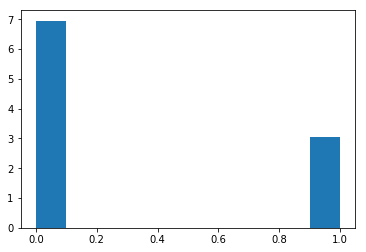

In [20]:
plt.hist(labelEst1, 10, density=True)
print('Bernouilli parameter =', np.mean(labelEst1))

### Confusion matrix (plot)

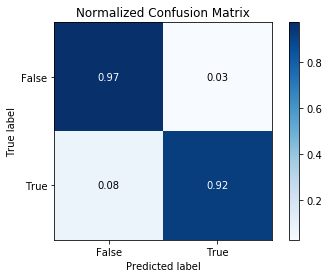

In [21]:
#skMetrics.confusion_matrix(labelTest, labelEst1)
skplt.metrics.plot_confusion_matrix(labelTest, labelEst1, normalize=True);

### Classification report

In [22]:
print(skMetrics.classification_report(labelTest, labelEst1))

              precision    recall  f1-score   support

       False       0.96      0.97      0.97      1376
        True       0.94      0.92      0.93       624

    accuracy                           0.96      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.96      0.96      0.96      2000



References :
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.get_params

### ROC curve

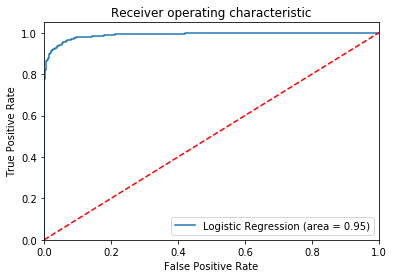

In [23]:
logit_roc_auc = skMetrics.roc_auc_score(labelTest, labelEst1)
fpr, tpr, thresholds = skMetrics.roc_curve(labelTest, model1.predict_proba(xTest.reshape(-1,1))[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

# Using TensorFlow

Reference:
- Inspired from https://www.geeksforgeeks.org/ml-logistic-regression-using-tensorflow/ BUT 
    - This example is mixing symbols and values. 
    - For example redefining several times the cost, prediction and accuracy
    - It is actualy quite inefficient
    - There is no verification of the model through a test sample
    - Modifications were also necessary to remove 1 dimension in the features/predictors

In [24]:
import tensorflow as tf

In [25]:
# Labels as integers {0,1}
labelTrainF = np.multiply(labelTrain, 1.0)
labelTrainF.dtype

dtype('float64')

In [26]:
# Batch size, learning rate, epochs
Nbatch = 1000
alpha = 0.01
Nepoch = 10000
# x and y are placeholders for our training data
X = tf.placeholder("float64", name='X')
Y = tf.placeholder("float64", name='Y')
# Initial weights
Wtf = tf.Variable(np.float64([1.0, 1.0]), name="W")
# Our model of y = sigmoid(a*x + b)
Y_model = tf.sigmoid(tf.multiply(X, Wtf[1]) + Wtf[0])
# Sigmoid Cross Entropy Cost Function 
Cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_model, labels = Y) 
# Prediction & Accuracy
CorrectPrediction = tf.equal(tf.greater(Y_model, 0.5), tf.greater(Y, 0.5))
Accuracy = tf.reduce_mean(tf.cast(CorrectPrediction, tf.float64))
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate = alpha).minimize(Cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 

In [27]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 

    # Initializing the Variables 
    sess.run(init) 
    
    # Lists for storing the evolution through epochs 
    costs, accuracies, intercepts, weights = [], [], [], [] 

    # Iterating through all the epochs 
    for epoch in range(Nepoch+1): 
       
        # Running the Optimizer 
        # Calculating cost, accuracy on current Epoch 
        xBatch, yBatch, labelBatch = generateBatch(Nbatch)
        _, c, accu, w = sess.run([optimizer, Cost, Accuracy, Wtf], feed_dict ={X: xBatch, Y: np.multiply(labelBatch, 1.0)}) 
                                    # feed_dict = {X : xTrain, Y : labelTrainF}) 

        # Save history 
        costs.append(np.sum(c))
        accuracies.append(accu)
        intercepts.append(w[0])
        weights.append(w[1])

        # Displaying result on current Epoch 
        if epoch % 1000 == 0 and epoch != 0: 
           print("Epoch", epoch, " Cost:", costs[-1], " Accuracy:", accuracies[-1], "Intercept:", intercepts[-6], "W:", weights[-1]) 
        

Epoch 1000  Cost: 622.315130635  Accuracy: 0.941 Intercept: -14.3298822541 W: 19.8549335761
Epoch 2000  Cost: 614.251044431  Accuracy: 0.951 Intercept: -18.1861158247 W: 25.3046810655
Epoch 3000  Cost: 599.969737999  Accuracy: 0.955 Intercept: -20.7152496741 W: 28.9075715954
Epoch 4000  Cost: 592.976338003  Accuracy: 0.944 Intercept: -22.6444004465 W: 31.6154927351
Epoch 5000  Cost: 608.119915884  Accuracy: 0.944 Intercept: -24.2844398247 W: 33.8025804508
Epoch 6000  Cost: 603.355938374  Accuracy: 0.937 Intercept: -25.5778607209 W: 35.7408843543
Epoch 7000  Cost: 596.936744614  Accuracy: 0.96 Intercept: -26.7751374217 W: 37.3872721826
Epoch 8000  Cost: 596.587652667  Accuracy: 0.947 Intercept: -27.8260486655 W: 38.8894266307
Epoch 9000  Cost: 602.799302191  Accuracy: 0.953 Intercept: -28.7604217239 W: 40.252355786
Epoch 10000  Cost: 596.201393042  Accuracy: 0.96 Intercept: -29.6297504622 W: 41.4780929383


SGD shows that there is not a single optimal value for b+w (intercept + slope) but a straight line  as shown on the graph below.
This is explained by the single feature: the decision boundary does not need to be a logistic curve, a single intercept point would be enough.

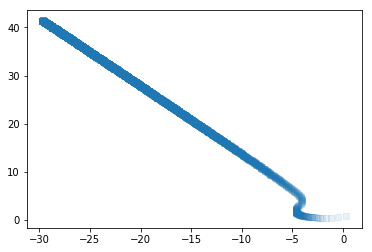

In [28]:
plt.scatter(intercepts, weights, marker=',', alpha=0.1);

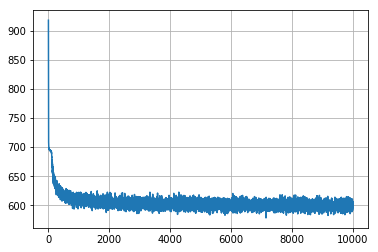

In [29]:
plt.plot(costs)
plt.grid()

# Where to go from here ?

__More complex models__ with the 2 feature [binary classification](ClassificationContinuous2Features.html) ([Notebook](ClassificationContinuous2Features.ipynb)) or the [K Nearest Neighbors classifier](ClassificationContinuous2Features-KNN.html) ([Notebook](ClassificationContinuous2Features-KNN.ipynb))

__Compare with the single feature linear regression__ [using simple algorithms](../linear/LinearRegressionUnivariate.html) ([Notebook](LinearRegressionUnivariate.ipynb])), [or using Tensorflow](LinearRegressionUnivariate-TensorFlow.html) ([Notebook](LinearRegressionUnivariate-TensorFlow.ipynb))